## 라이브러리 호출

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='NanumGothic') 
plt.rcParams['axes.unicode_minus'] = False 
from matplotlib import font_manager
# 폰트 경로 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  
font_prop = font_manager.FontProperties(fname=font_path)
import json
from konlpy.tag import Okt
from collections import Counter
import itertools


In [2]:
# json 불러오기
file_path = "../chunker/tucson_Owner's_Manual_pdfminer_chunks.json"
data = []

with open(file_path, "r", encoding="utf-8") as f:
    for line in f:
        data.append(json.loads(line))

tucson = pd.DataFrame(data)

# 결과 확인
print(tucson.head())


                                                text      type source_pages  \
0  _NX4.book  Page 1\n안전 및 차량 손상 경고 본 취급설명서에는 고객 ...                    [1]   
1                                          선택 또는 미장착  subtitle          [1]   
2  사양표시\n본 취급설명서에는 모든 트림모델 및 선택 사양을 포함하여 설명하\n고 있...  subtitle       [1, 2]   
3                                        내용 찾기 방법 설명     title          [2]   
4                              내용으로 찾을 때\n목차를 활용하세요.  subtitle          [2]   

  model  
0    투싼  
1    투싼  
2    투싼  
3    투싼  
4    투싼  


In [3]:
# 전체 행/열 수와 결측치 등 기본 정보
tucson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          485 non-null    object
 1   type          485 non-null    object
 2   source_pages  485 non-null    object
 3   model         485 non-null    object
dtypes: object(4)
memory usage: 15.3+ KB


In [4]:
print(tucson['type'].value_counts())
print("-"*50)
print(tucson['source_pages'].value_counts())
print("-"*50)
print(tucson['model'].value_counts())
print("-"*50)


type
title       343
subtitle    141
              1
Name: count, dtype: int64
--------------------------------------------------
source_pages
[5]                10
[502]               5
[3]                 5
[103]               4
[95]                4
                   ..
[33, 34, 35]        1
[35, 36, 37]        1
[37, 38]            1
[38, 39]            1
[515, 516, 517]     1
Name: count, Length: 423, dtype: int64
--------------------------------------------------
model
투싼    485
Name: count, dtype: int64
--------------------------------------------------


## 빈도기반 분석

In [5]:
from konlpy.tag import Okt
from collections import Counter
import itertools

# 1. Okt 형태소 분석기 초기화
okt = Okt()

# 2. 텍스트 데이터
tucson_texts = tucson['text'].tolist()

# 3. 각 문장을 형태소 분석하여 단어 단위로 나누기
tucson_tokenized = [okt.nouns(text) for text in tucson_texts]  # 명사 추출

# 불용어 처리 
stopwords = ['수', '를', '고', '이', '경', '주', '중', '시오', '의', '후', '시', '수', 
             '등', '때', '및', '경우','로']

# 4. 불용어 제거
tucson_filtered_tokens = [
    [word for word in sentence if word not in stopwords] for sentence in tucson_tokenized
]

# 5. 단어 빈도 집계 (불용어 제거 후 단어 리스트 사용)
tucson_flat_tokens = list(itertools.chain.from_iterable(tucson_filtered_tokens))  # 리스트 평탄화
tucson_word_freq = Counter(tucson_flat_tokens)


# 6. 상위 50개 단어 출력
tucson_top_n = 50
tucson_top_words = tucson_word_freq.most_common(tucson_top_n)

# 출력
for word, freq in tucson_top_words:
    print(f'{word}: {freq}')



차량: 1601
작동: 1303
상태: 1058
주행: 1054
시동: 879
보조: 843
표시: 832
사용: 658
기능: 655
설정: 631
버튼: 590
시스템: 588
주차: 586
장치: 570
경고: 557
점검: 535
브레이크: 521
엔진: 515
도어: 515
전방: 501
속도: 498
타이어: 484
키: 481
충돌: 459
자동: 458
스마트: 448
방지: 416
운전: 407
해제: 403
이상: 388
좌석: 387
차: 386
센서: 375
주의: 371
확인: 364
운전자: 362
조절: 356
안전: 350
고등: 349
페달: 329
위치: 314
석: 312
변속: 311
클러스터: 304
습: 301
테: 295
발생: 289
인식: 278
오: 276
모드: 271


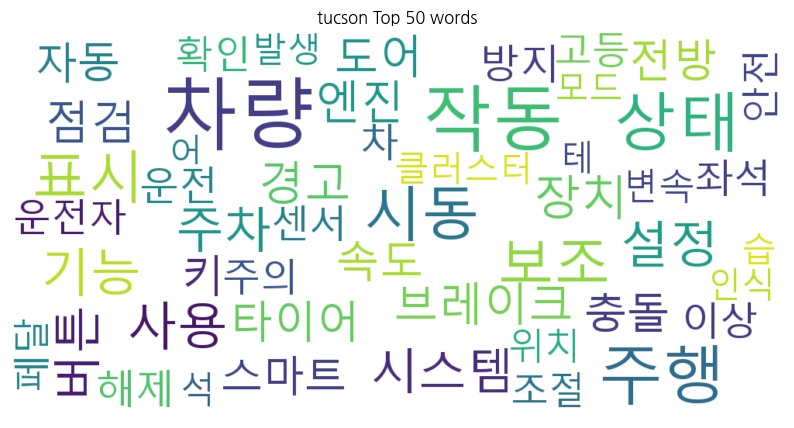

In [6]:
from wordcloud import WordCloud
# 1. top_words를 dict 형태로 변환
tucson_top_words_dict = dict(tucson_top_words)

# 2. 워드 클라우드 시각화
tucson_wordcloud = WordCloud(width=1000, height=500, background_color='white',
                      font_path='C:/Windows/Fonts/malgun.ttf', 
                      max_font_size=100,  # 글자 크기 제한
                      min_font_size=20,   # 최소 글자 크기
                      prefer_horizontal=0.9).generate_from_frequencies(tucson_top_words_dict)

# 3. 시각화 출력
plt.figure(figsize=(10, 6))
plt.imshow(tucson_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("tucson Top 50 words")
plt.show()

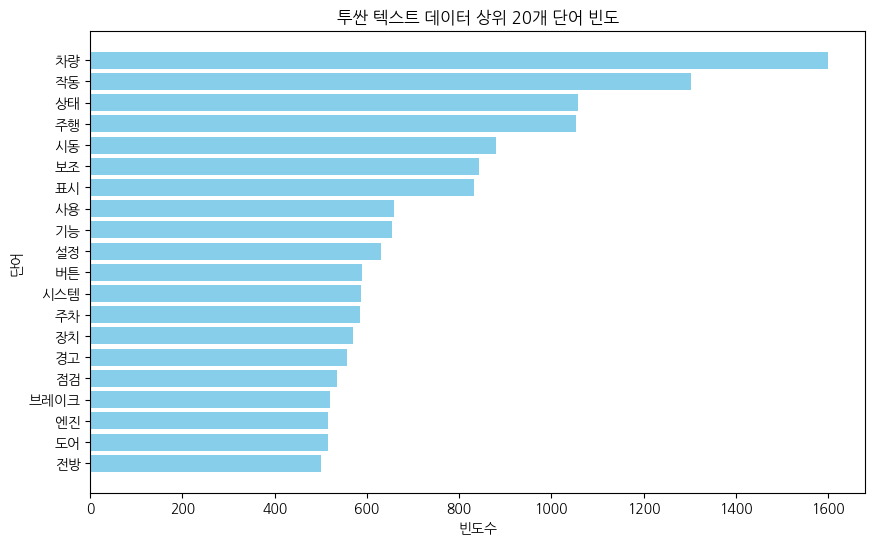

In [7]:
tucson_top_words2 = tucson_word_freq.most_common(20)
tucson_top_words_dict2 = dict(tucson_top_words2)
tucson_words, tucson_counts = zip(*tucson_top_words2)# 단어와 빈도를 분리

plt.figure(figsize=(10, 6))
plt.barh(tucson_words, tucson_counts, color='skyblue')
plt.xlabel('빈도수')
plt.ylabel('단어')
plt.title('투싼 텍스트 데이터 상위 20개 단어 빈도')
plt.gca().invert_yaxis()  # 상위 단어가 위에 오도록 설정
plt.show()

## TF-IDF 기반 분석

차량: 24.9556
보조: 21.5694
작동: 20.7442
표시: 20.3449
주행: 19.3873
시동: 16.9162
상태: 16.5739
전방: 16.2276
엔진: 15.8823
타이어: 14.5217
경고: 14.4164
고등: 14.3392
설정: 13.9948
주차: 13.6450
점검: 13.2748
시스템: 12.9415
충돌: 12.7855
도어: 12.7772
버튼: 12.7517
기능: 12.6101
스마트: 12.5129
브레이크: 12.4864
장치: 12.4508
속도: 11.5081
자동: 11.2009
좌석: 11.0670
조절: 10.7531
사용: 10.5136
방지: 10.4844
센서: 9.6424
차로: 9.5969
클러스터: 9.3276
에어백: 9.0617
변속: 9.0346
운전: 9.0330
연료: 8.9199
해제: 8.8341
제한: 8.8339
게이트: 8.8270
이상: 8.4731
페달: 8.4730
안전: 8.4166
모드: 8.3442
배터리: 8.2705
운전자: 8.2475
주의: 7.7634
인식: 7.6674
거리: 7.5574
후방: 7.3947
제어: 7.3326


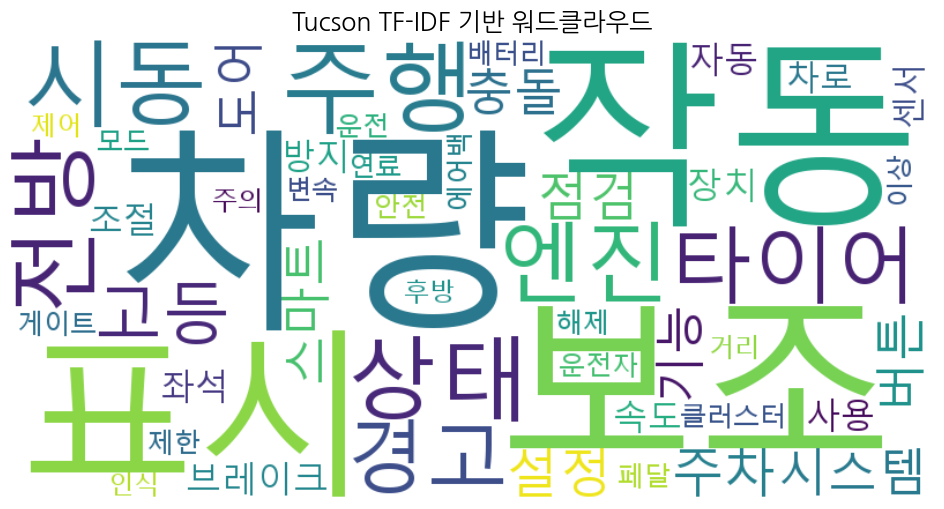

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 문서별로 띄어쓰기 기준으로 연결
tucson_docs = [' '.join(tokens) for tokens in tucson_filtered_tokens]

# 2. TF-IDF 벡터화
tucson_vectorizer = TfidfVectorizer()
tucson_X = tucson_vectorizer.fit_transform(tucson_docs)

# 3. 단어와 점수 추출
tucson_words = tucson_vectorizer.get_feature_names_out()
tucson_scores = tucson_X.sum(axis=0).A1  # 각 단어의 TF-IDF 점수 합계
tucson_word_scores = dict(zip(tucson_words, tucson_scores))

tucson_top_50 = sorted(tucson_word_scores.items(), key=lambda x: x[1], reverse=True)[:50]
for tucson_word, tucson_score in tucson_top_50:
    print(f"{tucson_word}: {tucson_score:.4f}")
# 4. 워드클라우드 시각화
# top_50이 리스트 형태일 때 → dict로 변환
tucson_top_50_dict = dict(tucson_top_50)

# 워드클라우드 생성
tucson_wordcloud = WordCloud(
    font_path='malgun.ttf',
    width=800, height=400,
    background_color='white'
).generate_from_frequencies(tucson_top_50_dict)

# 시각화
plt.figure(figsize=(12, 6))
plt.imshow(tucson_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Tucson TF-IDF 기반 워드클라우드", fontsize=18)
plt.show()


## 네트워크 그래프

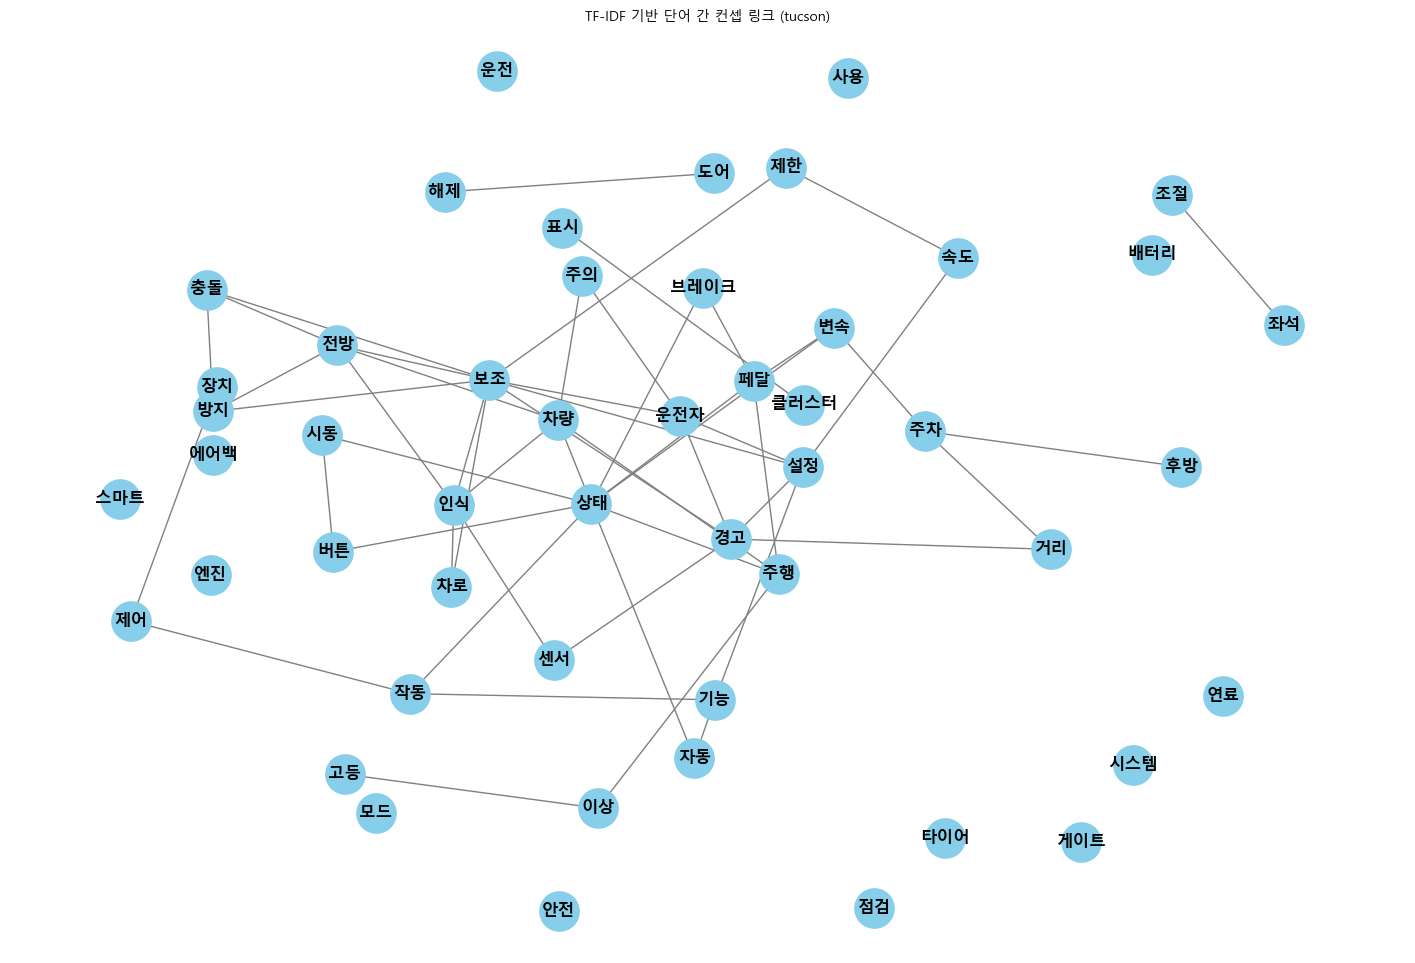

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 1. tucson_top_50 단어 리스트와 인덱스 추출
tucson_top_words = [word for word, score in tucson_top_50]
tucson_top_indices = [tucson_vectorizer.vocabulary_[word] for word in tucson_top_words]

# 2. 각 단어의 TF-IDF 벡터 추출 (문서 수 만큼 있는 벡터를 단어별로 전치)
tucson_word_vectors = tucson_X[:, tucson_top_indices].T.toarray()  # shape: (50, num_docs)

# 3. 단어 간 코사인 유사도 계산
tucson_similarity_matrix = cosine_similarity(tucson_word_vectors)

# 4. 네트워크 그래프 생성
tucson_G = nx.Graph()

# 노드 추가
for word in tucson_top_words:
    tucson_G.add_node(word)

# 엣지 추가 (유사도 임계값 이상일 때만)
tucson_threshold = 0.4  # 유사도 기준 (필요에 따라 조절 가능)
for i in range(len(tucson_top_words)):
    for j in range(i + 1, len(tucson_top_words)):
        sim = tucson_similarity_matrix[i][j]
        if sim >= tucson_threshold:
            tucson_G.add_edge(tucson_top_words[i], tucson_top_words[j], weight=sim)
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 말굽 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)

# 시각화
plt.figure(figsize=(18, 12))
tucson_pos = nx.spring_layout(tucson_G, k=0.5, seed=42)
nx.draw_networkx_nodes(tucson_G, tucson_pos, node_color='skyblue', node_size=800)

# ✅ 한글 폰트 설정: font_family에 폰트 이름 넣기
nx.draw_networkx_labels(
    tucson_G, tucson_pos,
    font_size=12,
    font_weight='bold',
    font_family=font_prop.get_name()
)

nx.draw_networkx_edges(tucson_G, tucson_pos, edge_color='gray')

# 제목에도 폰트 적용하고 싶다면:
plt.title("TF-IDF 기반 단어 간 컨셉 링크 (tucson)", fontsize=50, fontproperties=font_prop)
plt.axis('off')
plt.show()


## 청크 오류 확인

In [10]:
# 조사로 끝나는 text 청크 확인
import re

def is_cut_off(text):
    return bool(re.search(r'(는|가|을|를|에|으로|에게|와|과)$', text.strip()))

tucson['cut_off'] = tucson['text'].apply(is_cut_off)
tucson_cut = tucson[tucson['cut_off']]
print(tucson_cut[['text']])

                                                  text
462  9\n매연 관리 방법\n매연의 발생은 에어클리너, 연료필터, 분사 노\n즐, 엔진의...


In [11]:
# 특수기호로 시작하는 청크 확인
# '-', '*', ',', '.' 로 시작하는 텍스트 필터링
special_start = tucson[tucson['text'].str.match(r'^[-\*,\.]')]

# 결과 확인
print(special_start[['text']])


Empty DataFrame
Columns: [text]
Index: []


In [12]:
from transformers import GPT2LMHeadModel, PreTrainedTokenizerFast
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm

# tqdm 적용
tqdm.pandas()

# 1. KoGPT 불러오기
tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2")
model = GPT2LMHeadModel.from_pretrained("skt/kogpt2-base-v2")
model.eval()

# 2. Perplexity 계산 함수
def get_perplexity(text):
    try:
        if len(text) < 100:  # 100자 미만은 계산 안 함
            return np.nan
        encodings = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
        input_ids = encodings.input_ids
        with torch.no_grad():
            outputs = model(input_ids, labels=input_ids)
            loss = outputs.loss
        return np.exp(loss.item())
    except:
        return np.nan

# 3. 전체 텍스트에 대해 perplexity 계산 (100자 이상만)
tucson['perplexity'] = tucson['text'].progress_apply(get_perplexity)

# 4. Perplexity 기준 상위 10개 출력 (문제가 의심되는 문장)
problematic_texts = tucson.sort_values(by='perplexity', ascending=False).head(10)
print(problematic_texts[['text', 'perplexity']])


c:\Users\jeongbin\Projects\hyundai_reg_bot\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.
100%|██████████| 485/485 [09:18<00:00,  1.15s/it]

                                                  text  perplexity
302  7\n_NX4.book  Page 4\n운전자 보조\n운전자 보조 알아두기\n인포테...  319.504791
351  트롤 설정\n2C_NSCCSetInfo\n시동 'ON' 상태에서 인포테인먼트 시스템...  294.860106
210  5\n• 전방에 신호등, 반사 표지판, 발광 표지판 또\n는 도로 반사경이 있을 경...  278.954365
13   목 차\n안 내 및 차 량 정 보\n안 전 및 주 의 사 항\n시 트 및 안 전 장...  266.187984
2    사양표시\n본 취급설명서에는 모든 트림모델 및 선택 사양을 포함하여 설명하\n고 있...  263.304420
92   F\n연료  주입구가  차량  좌측에  있음을  나타냅니\n다.\n시동 'ON' 상...  196.110341
130  `\n비상 경고등 버튼을 누르면 양쪽 방향지시등이 같이 깜빡입니다. 방향지시등과 비...  186.441313
355  7\n차선이 인식된 경우\n2C_LKALaneDetectInfo_1\n• 클러스터 ...  182.827975
43   1\nONX4010021\nIdentification\n차대  번호(VIN:  Ve...  179.764219
131  _\n미등 표시등은 조명 스위치를 미등 위치에 두었\n을 때 켜집니다.\n조명 스위...  148.787432


In [4]:
a=[302,351,210,13,2,92,130,355,43,131]
for i in (a):
    print(tucson.loc[i,'text'])
    print('='*50)

7
_NX4.book  Page 4
운전자 보조
운전자 보조 알아두기
인포테인먼트 소프트웨어 업데이트로 인해 운
전자 보조 시스템의 각 기능의 설명이 취급설명
서와 다를 수 있습니다.
트롤 설정
2C_NSCCSetInfo
시동 'ON' 상태에서 인포테인먼트 시스템의 설
정 > 차량 > 운전자 보조 > 주행 편의 > 고속도로
주행속도 자동 조절을 차례로 선택하십시오. 내
비게이션 기반 스마트 크루즈 컨트롤이 켜집니
다.
_NX4.book  Page 75
5
• 전방에 신호등, 반사 표지판, 발광 표지판 또
는 도로 반사경이 있을 경우
• 전방에 임시로 설치된 반사체, 발광체가 있
을 경우(공사 구간)
• 젖은 노면, 눈, 빙판길 등 도로 환경이 나쁠
경우
• 곡선로  등에서  전방  차량이  갑자기  나타날
경우
목 차
안 내 및 차 량 정 보
안 전 및 주 의 사 항
시 트 및 안 전 장 치
클 러 스 터
편 의 장 치
시 동 및 주 행
운 전 자 보 조
비 상 시 응 급 조 치
정 기 점 검
색 인
보 증 서 / 보 증 수 리 서
사양표시
본 취급설명서에는 모든 트림모델 및 선택 사양을 포함하여 설명하
고 있습니다.
고객님의 차량에 장착되지 않는 사양에 대한 설명이 포함될 수 있습
니다.
_NX4.book  Page 2
F
연료  주입구가  차량  좌측에  있음을  나타냅니
다.
시동 'ON' 상태일 때, 연료 탱크에 남아있는 연 료의 잔량이 표시됩니다. 연료계가 'E'를 가리 키기 전에 연료를 보충하고, 클러스터에 연료 부족 경고등이 켜지면 연료를 신속히 보충하십 시오. 연료 잔량은 시동이 켜진 상태에서만 표 시됩니다.
• 고속도로나 자동차 전용 도로를 주행하기 전
에는  연료의  양이  충분한지  연료계를  미리 확인하십시오.
• 경사진 곳에서는 연료가 연료 탱크 한쪽으로
쏠려  연료의  잔량이  정확히  표시되지  않을
수 있습니다.
`
비상 경고등 버튼을 누르면 양쪽 방향지시등이 같이 깜빡입니다. 방향지시등과 비상 경고등이 비정상적으로 빠 르거나 느리

# 이상 없음.

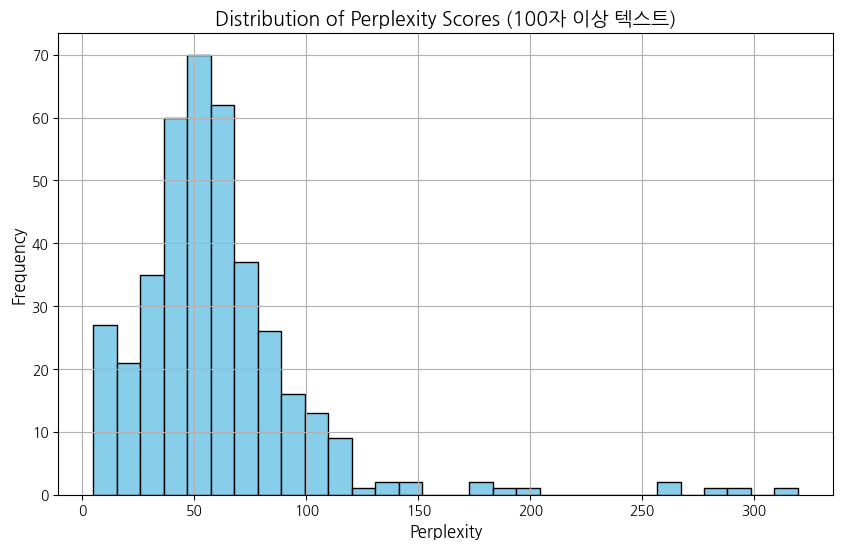

In [13]:
import matplotlib.pyplot as plt

# NaN 제거
valid_perplexities = tucson['perplexity'].dropna()

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(valid_perplexities, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Perplexity Scores (100자 이상 텍스트)', fontsize=14)
plt.xlabel('Perplexity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()
